In [1]:
import numpy as np

# This script will model a 3-state Markov chain model (MCM) for gene expression involving transcription factors. 

# The first state will be an inactive repressor-bound state and will be represented by the value 0.

# The second state will be an unbound state for basal level transcription and will be represented by the value 1.

# The third state will be an activator-bound state for active transcription and will be represented by the value 2.


# Function that determines the next state of the 3-state MCM using a binomial distribution.

def transcription_state(state, pr1_pa1, pr2, pa2):
    
    
    # Possible transition states for the unbound state. Three possible values using a binomial distribution. 
    
    # The three possible states are remain unbound, repressor-bound, or activator-bound. 
    
    # Default parameters give 50% probability to remain unbound (unbound_states=1), 25% probability to become repressor-bound (unbound_states=0) 
    
    # or 25% probability to become activator-bound (unbound_states=2). 
    
    unbound_states = np.random.binomial(2, pr1_pa1)
    
    
    # Possible transition states for repressor-bound state.

    repressor_states = np.random.binomial(1, pr2)
    
    
    # Possible transition states for activator-bound state. 
    
    activator_states = np.random.binomial(1, pa2)
    
    
    # If the repressor-bound state fails transition remain in repressor state.
    
    if state == 0 and repressor_states == 0:
        
        return 0
    
    
    # If the repressor-bound state succeeds in transition then transition to unbound state.
    
    elif state == 0 and repressor_states == 1:
        
        return 1
    
    
    # If the unbound state succeeds in tranisition then transition to repressor-bound state.
    
    elif state == 1 and unbound_states == 0:
        
        return 0
    
    # If the unbound state fails to transition remain in unbound state.
    
    elif state == 1 and unbound_states == 1:
        
        return 1
    
    
    # If the unbound state succeeds in transition then transition to activator-bound state. 
    
    elif state == 1 and unbound_states == 2:
        
        return 2
    
    
    # If the activator-bound state fails to transition remain in activator state.
    
    elif state == 2 and activator_states == 0:
        
        return 2
    
    
    # If the activator-bound state succeeds in transition then transition to unbound state.
    
    elif state == 2 and activator_states == 1:
        
        return 1
    

# Initial state
    
state = 1


# Array to hold state transition history.

state_history = [state]


# Iterates a given number of times calculating the next state using the previous state.

for i in range(0, 100):
    
    
    # Assigns the next transition state to the variable state.
    
    state = transcription_state(state, 0.50, 0.25, 0.25)
    
    
    # Adds the next transition state to the array state_histroy.
    
    state_history.append(state)
    
    
print(state_history)
    

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


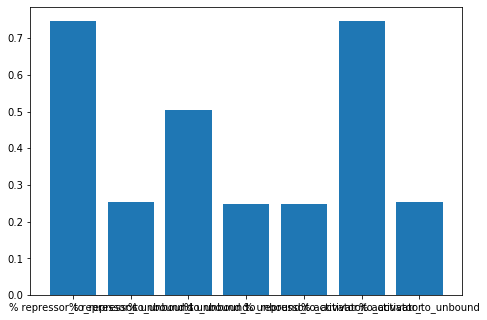

In [10]:
import matplotlib.pyplot as plt


# Will record number of repressor to repressor transition events.

repressor_to_repressor = 0


# Will record number of unbound to unbound transition events.

unbound_to_unbound = 0


# will record number of activator_to_activator transition events.

activator_to_activator = 0


# Will record number of repressor to unbound transition events.

repressor_to_unbound = 0


# Will record number of unbound to repressor transition events.

unbound_to_repressor = 0


# Will record number of unbound to activator transition events.

unbound_to_activator = 0


# Will record number of activator to unbound transition events.

activator_to_unbound = 0


# Iterates over the length of state_histroy - 1 to determine number and type of transition events.

for i in range(0, len(state_history) - 1):
    
    
    # Assigns the current state in the iteration to current_state
    
    current_state = state_history[i]
    
    
    # Assigns the next state in the iteration to current_state
    
    next_state = state_history[i + 1]
    
    
    # Repressor to repressor state.
    
    if current_state == 0 and next_state == 0:
        
        repressor_to_repressor += 1
        
        
    # Unbound to unbound state.
        
    elif current_state == 1 and next_state == 1:
        
        unbound_to_unbound += 1
        
        
    # Activator to activator state.    
    
    elif current_state == 2 and next_state == 2:
        
        activator_to_activator += 1

    
    # Repressor to unbound transition event.
    
    elif current_state == 0 and next_state == 1:
        
        repressor_to_unbound += 1
        
        
    # Unbound to repressor transition event.    
    
    elif current_state == 1 and next_state == 0:
        
        unbound_to_repressor += 1
        
        
    # Unbound to activator transition event.
    
    elif current_state == 1 and next_state == 2:
        
        unbound_to_activator += 1
        
        
    # Activator to unbound  transition event.
    
    elif current_state == 2 and next_state == 1:
        
        activator_to_unbound += 1
        

# Used to create a dictonary from the state_history list. Allows one to track how many times each state occurred.        

state_history_dict = {}


for i in state_history:

    state_history_dict[i] = state_history_dict.get(i, 0) + 1
        

# Generates bar graph for the number of all the different type of transition events.

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

labels = ['% repressor_to_repressor', '% repressor_to_unbound', '% unbound_to_unbound', '% unbound_to_repressor',
               '% unbound_to_activator', '% activator_to_activator', '% activator_to_unbound']

state_stats = [repressor_to_repressor / state_history_dict[0], 
               
               repressor_to_unbound / state_history_dict[0], 
               
               unbound_to_unbound / state_history_dict[1], 
               
               unbound_to_repressor / state_history_dict[1],
               
               unbound_to_activator / state_history_dict[1], 
               
               activator_to_activator / state_history_dict[2], 
               
               activator_to_unbound / state_history_dict[2]]

ax.bar(labels, state_stats)

plt.show()

fig.savefig('% occurence of transition events.png')